In [1]:
from Bio import SeqIO,pairwise2
from Bio.Seq import Seq 
from Bio.pairwise2 import format_alignment

from Bio.SeqUtils import MeltingTemp as mt ,GC , molecular_weight as mw 

from collections import Counter
from Levenshtein import distance

import matplotlib.pyplot  as plt

In [3]:
seqx = SeqIO.read('x.fasta','fasta').seq
seqy = SeqIO.read('y.fasta','fasta').seq

print(str(seqx))
print(str(seqy))

ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGNNNNNNNNNNNNNNNNNNCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACGCGTCAC

In [4]:
seqx_ = str(seqx)
seqx_ = seqx_.replace('N','')
seqx = Seq(seqx_)
seqx

Seq('ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGC...TCA')

In [5]:
print("Length seqx : ", len(seqx))
print("Length seqy : ", len(seqy))

Length seqx :  1865
Length seqy :  1050


In [7]:
print("Index sequence x of (CGC) : ", seqx.find('CGC'))
print("Index sequence y of (CGC) : ", seqy.find('CGC'))

Index sequence x of (CGC) :  51
Index sequence y of (CGC) :  39


In [8]:
seqxy1 = seqx[:10] + seqy[-5:]
seqxy2 = seqx[:20] + seqy[-3:]
seqz = (seqxy1+seqxy2)[::-1]
seqz

Seq('CAGTTCAGGTCTAGGTTGTGGTACAGCTGGTTGTGGTA')

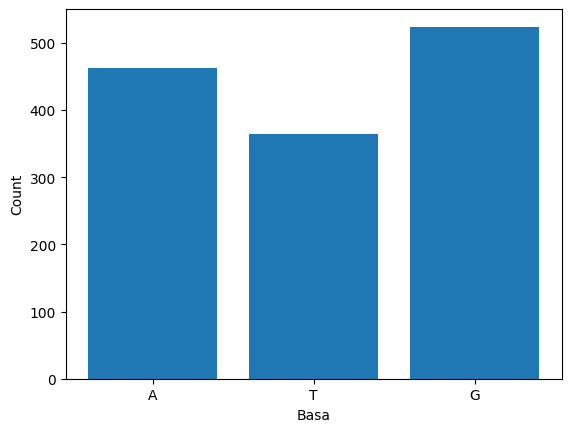

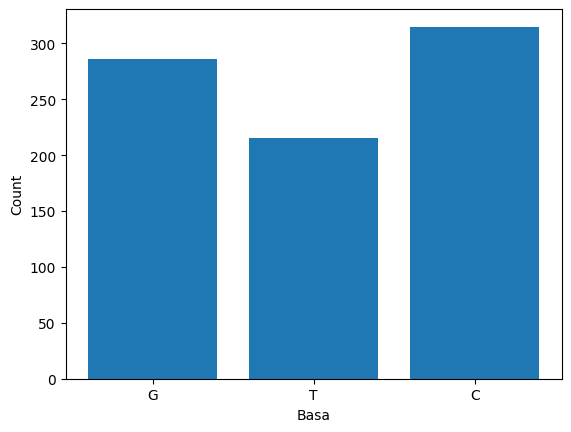

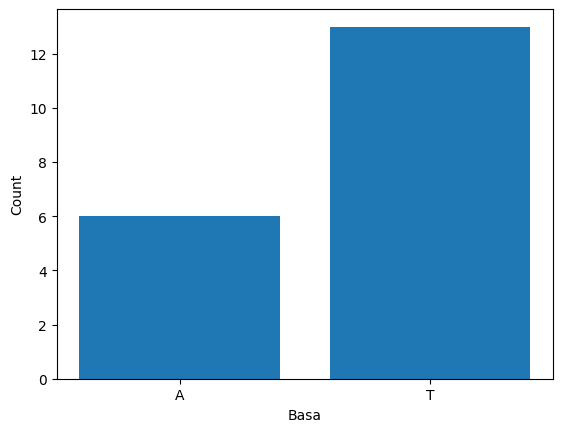

In [13]:
count_seqx = Counter(seqx)
ATG = {key: value for key,value in count_seqx.items() if key in ['A','T','G']}
plt.bar(ATG.keys(), ATG.values())
plt.xlabel('Basa')
plt.ylabel('Count')
plt.show()

count_seqy = Counter(seqy)
TCG = {key: value for key,value in count_seqy.items() if key in ['T','C','G']}
plt.bar(TCG.keys(), TCG.values())
plt.xlabel('Basa')
plt.ylabel('Count')
plt.show()

count_seqz = Counter(seqz)
TA = {key: value for key,value in count_seqz.items() if key in ['A','T']}
plt.bar(TA.keys(), TA.values())
plt.xlabel('Basa')
plt.ylabel('Count')
plt.show()

In [14]:
print("CG in seqx :", GC(seqx),' %')
print("AT in seqx :", 100 - GC(seqx),' %')
print("--------------------------")
print("\nCG in seqy :", GC(seqy),' %')
print("AT in seqy :", 100 - GC(seqy),' %')
print("--------------------------")
print("\nCG in seqz :", GC(seqz),' %')
print("AT in seqz :", 100 - GC(seqz),' %')
print("--------------------------")

CG in seqx : 55.710455764075064  %
AT in seqx : 44.289544235924936  %
--------------------------

CG in seqy : 57.23809523809524  %
AT in seqy : 42.76190476190476  %
--------------------------

CG in seqz : 50.0  %
AT in seqz : 50.0  %
--------------------------


In [15]:
print("Melting Temp of seqx :", mt.Tm_Wallace(seqx))
print("Melting Temp of seqy :", mt.Tm_Wallace(seqy))
print("Melting Temp of seqz :", mt.Tm_Wallace(seqz))


Melting Temp of seqx : 5808.0
Melting Temp of seqy : 3302.0
Melting Temp of seqz : 114.0


In [16]:
print("Molecular weight of seqx :", mw(seqx))
print("Melting Temp of seqy :", mw(seqy))
print("Melting Temp of seqz :", mw(seqz))


Molecular weight of seqx : 576878.2617000061
Melting Temp of seqy : 323955.0287000012
Melting Temp of seqz : 11906.5575


In [21]:
print("OG seqx:", seqx)
transcribe_x = Seq.transcribe(seqx)
print("Transcribed seqx:", transcribe_x)
translate_x = Seq.translate(seqx)
print("Translated seqy:",translate_x)

print("\nOG seqy:", seqy)
transcribe_y = Seq.transcribe(seqy)
print("Transcribed seqy:", transcribe_y)
translate_y = Seq.translate(seqy)
print("Translated seqy:",translate_y)

print("\nOG seqz:", seqz)
transcribe_z = Seq.transcribe(seqz)
print("Transcribed seqz:", transcribe_z)
translate_z = Seq.translate(seqz)
print("Translated seqz:",translate_z)


OG seqx: ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACGCGTCACCACATGACA

c:\Users\derry\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [22]:
local = pairwise2.align.localxx(seqx,seqy)
print("Local alignment of x y: ")
for alignment in local:
    print(format_alignment(*alignment))

globall = pairwise2.align.globalxx(seqx,seqy)
print("Global alignment of x y: ")
for alignment in globall:
    print(format_alignment(*alignment))

Local alignment of x y: 
6 GTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGA

In [23]:
def hemming(seqx,seqy):
    return sum(lim1!=lim2 for lim1,lim2 in zip(seqx,seqy))

In [24]:
print("Hemming x y: ",hemming(seqx,seqy))

Hemming x y:  755


In [25]:
print("Levenstain:", distance(str(seqx), str(seqy)))

Levenstain: 1028
